In [21]:
import libs
import tensorflow
import os

In [22]:
basedir= '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search'

In [23]:
files=[os.path.join(basedir, file_i)
      for file_i in os.listdir(basedir)
      if file_i.endswith('.jpg')]

In [31]:
%matplotlib inline #this is for displaying the image down there
files[50]

['/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (1).jpg',
 '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (2).jpg',
 '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (3).jpg',
 '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (4).jpg',
 '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (5).jpg']

In [32]:
import matplotlib.pyplot as plt

In [53]:
#Loading an image
img = plt.imread(files[0])
plt.imshow(img)

TypeError: Object does not appear to be a 8-bit string path or a Python file-like object

In [34]:
import numpy as np

In [35]:
img.shape

(150, 336, 3)

# ndim says how many dimesnions there are: height, weight, color = 3 channels

In [85]:
files=[file_i for file_i in files if plt.imread(file_i).ndim ==3] #make our list of file only based on RGB images. only those images which have ndim ==3
print (files)

['/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (1).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (2).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (3).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (4).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (5).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (6).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (7).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (8).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (9).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q==.jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\9k= (1).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\9k= (10).jpg', '/Users/

In [38]:
img.dtype

dtype('uint8')

In [39]:
img.max()

255

In [43]:
flt_img=img/255.0

In [44]:
flt_img.dtype

dtype('float64')

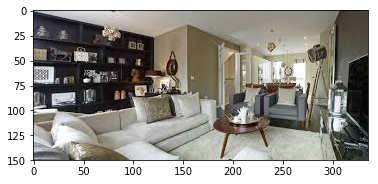

In [45]:
plt.imshow(flt_img)

In [47]:
from libs import utils

In [48]:
sqimg=utils.imcrop_tosquare(img)

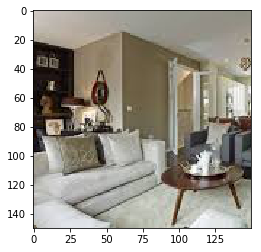

In [49]:
plt.imshow(sqimg)

In [50]:
from scipy.misc import imresize

In [51]:
rsz=imresize(sqimg,(100,100))

['/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (1).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (2).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (3).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (4).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (5).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (6).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (7).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (8).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q== (9).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\2Q==.jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\9k= (1).jpg', '/Users/VinaRahimian/Desktop/cozy interior designs _ Google Search\\9k= (10).jpg', '/Users/

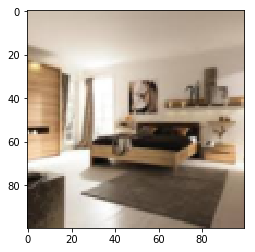

In [86]:
plt.imshow(rsz)

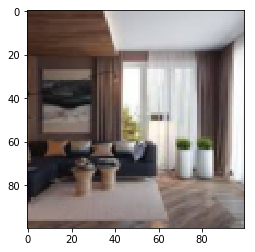

In [89]:
#here we want to resize all the images and put them in one single list
imgs=[] #list of all images
for file_i in files:
    #load the image
    img=plt.imread(file_i)
    # converts RGBA to RGB
    if img.ndim==3 and img.shape[2]>3:
        img=img[...,3]
    #convert grayscale to colored    
    if img.ndim ==2:
        img=img[...,np.newaxis]
        img=np.concatenate(2,(img,img,img))
    #crop the image
    sqimg=utils.imcrop_tosquare(img)
    #resize the image
    rsz=imresize(sqimg,(100,100))
    imgs.append(rsz)

mean_img=np.mean(imgs)
plt.imshow(imgs[10])

In [90]:
#trying an alternative way of doing the same thing we did above
#altr=[imresize(utils.imcrop_tosquare(plt.imread(file_i)),(100,100))]
#print (altr) 

In [91]:
ds=np.array(imgs)

In [92]:
ds.shape

(100, 100, 100, 3)

In [93]:
mean_img=np.mean(ds, axis=0) #converts mean image into float value
mean_img.shape

(100, 100, 3)

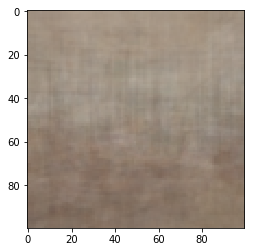

In [94]:
plt.imshow(mean_img/255.0)

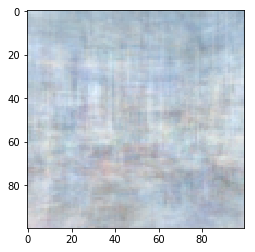

In [98]:
#Now we want to calculate the satndard deviation of the images
stdimg=np.std(ds, axis=0)
plt.imshow(stdimg/stdimg.max())

In [99]:
flattened=ds.ravel()

In [100]:
flattened.shape

(3000000,)

(array([  2020.,   2895.,   3301.,   4167.,   4467.,   4255.,   4541.,
          4551.,   4602.,   4834.,   5298.,   5437.,   5476.,   5908.,
          5848.,   6275.,   6331.,   6814.,   6908.,   7067.,   6983.,
          7200.,   7464.,   7646.,   7526.,   7743.,   7912.,   8343.,
          8357.,   8839.,   8991.,   8825.,   9097.,   9116.,   9195.,
          9612.,   9636.,   9393.,   9965.,   9922.,   9936.,  10107.,
         10198.,  10025.,  10102.,  10535.,  10629.,  10686.,  10888.,
         11002.,  11025.,  11375.,  11147.,  11295.,  11458.,  11341.,
         11260.,  11359.,  11638.,  11709.,  11629.,  11894.,  11834.,
         11840.,  12317.,  11949.,  12245.,  12010.,  11842.,  11953.,
         11758.,  12098.,  11821.,  12054.,  12211.,  12243.,  12361.,
         12392.,  12339.,  12371.,  12873.,  12421.,  12601.,  12721.,
         12572.,  12621.,  12550.,  13099.,  12901.,  12813.,  12863.,
         12737.,  13022.,  12898.,  13016.,  13072.,  12887.,  12880.,
      

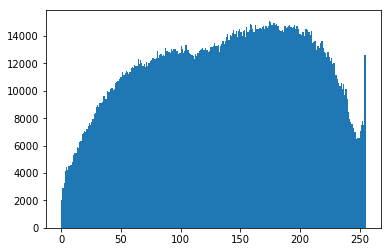

In [101]:
plt.hist(flattened, 255) #we want to see what is the distribution of our colors in the images

In [108]:
#normalization:norm_img=(img-mean_img)/std_img
norm_ds = (ds-mean_img)/stdimg
norm_ds.min(), norm_ds.max()

(-3.3689619053222, 3.0814876303919876)

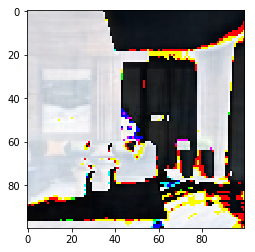

In [110]:
plt.imshow(norm_ds[10]/10.0+3)

(array([  2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   4.00000000e+00,   6.00000000e+00,
          3.00000000e+00,   3.00000000e+00,   4.00000000e+00,
          1.10000000e+01,   6.00000000e+00,   1.50000000e+01,
          1.60000000e+01,   2.30000000e+01,   2.20000000e+01,
          4.00000000e+01,   4.40000000e+01,   5.10000000e+01,
          4.20000000e+01,   6.30000000e+01,   6.10000000e+01,
          8.10000000e+01,   5.20000000e+01,   7.80000000e+01,
          1.03000000e+02,   9.40000000e+01,   1.15000000e+02,
          1.40000000e+02,   1.70000000e+02,   1.60000000e+02,
          1.99000000e+02,   2.25000000e+02,   2.69000000e+02,
          2.83000000e+02,   3.76000000e+02,   3.96000000e+02,
          4.58000000e+02,   5.49000000e+02,   6.16000000e+02,
          6.83000000e+02,   8.00000000e+02,   8.81000000e+02,
          1.06500000e+03,   1.20400000e+03,   1.30300000e+03,
          1.52500000e+03,   1.66100000e+03,   1.84500000e+03,
        

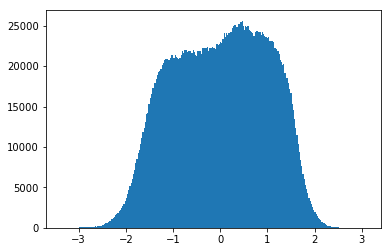

In [113]:
plt.hist(norm_ds.ravel(), 255)